## This is a Python analysis of RideAustin's daily ride requests, identifying a weekly cycle in requests

Data was made available by CEO Andy Tryba, at https://data.world/andytryba/rideaustin

Ride Austin is a nonprofit, municipal ridesharing service based in Austin, Texas, with a model comparing directly to that of Uber. The data released covers rides requested from June 16 to August 31, just over 11 weeks. It shows a clear cycle weekly, typically with peak ride demand on Saturday. 

To identify and quantify this cycle, I'm adapting code from Jason Brownlee, available here: http://machinelearningmastery.com/time-series-seasonality-with-python/

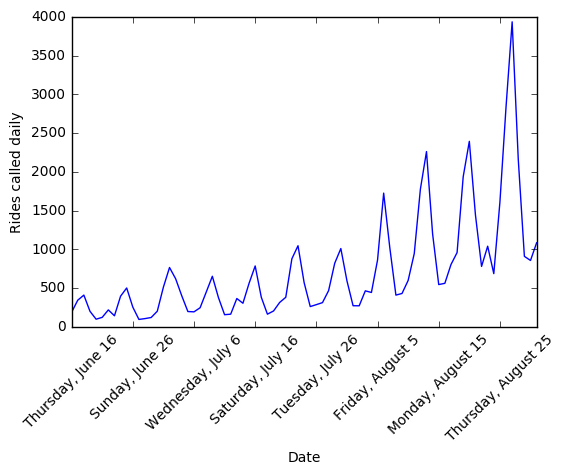

In [1]:
#loading the dataset
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('RideVolume.csv', header=0)
series.plot()
pyplot.xticks(rotation=45)
pyplot.ylabel('Rides called daily')
pyplot.show()
pyplot.close()

Plainly, the plot shows a regular weekly spike; count and you see 11 spikes, corresponding to the 11+ weeks in the data set. We also see a dramatic growth in this time, a 10-fold expansion from the first to the last Saturday in the series. Though it's less obvious, the less popular days (Monday and Tuesday) also show a roughly 10x expansion across this time. 

Intuitively, the set of points looks much like a exponential growth, with some additional fluctuations in it. To model this as a curve-fit directly from the data points will be difficult, because there is a large difference between the days of the week. So, I'm going to separate the data points available into the different specific days of the week, and perform an exponential growth curve fit on these series.

This code is adapted in part from Leandro's answer, here:
http://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly

In [2]:
# Separating the CSV into a series for each date.
# Because the number of entries is small, it makes 
# sense to do this by hand-entering integer location values.
# However, these values can be generated automatically for any range, with a little work.
Mondays=series.iloc[[4,11,18,25,32,39,46,53,60,67,74]]
Tuesdays=series.iloc[[5,12,19,26,33,40,47,54,61,68,75]]
Wednesdays=series.iloc[[6,13,20,27,34,41,48,55,62,69,76]]
Thursdays=series.iloc[[0,7,14,21,28,35,42,49,56,63,70]]
Fridays=series.iloc[[1,8,15,22,29,36,43,50,57,64,71]]
Saturdays=series.iloc[[2,9,16,23,30,37,44,51,58,65,72]]
Sundays=series.iloc[[3,10,17,24,31,38,45,52,59,66,73]]
print(Saturdays)

Date
Saturday, June 18       411
Saturday, June 25       503
Saturday, July 2        767
Saturday, July 9        654
Saturday, July 16       787
Saturday, July 23      1048
Saturday, July 30      1012
Saturday, August 6     1727
Saturday, August 13    2263
Saturday, August 20    2395
Saturday, August 27    3937
Name: Rides, dtype: int64


In [8]:
#Now we can find a curve which fits to the Saturdays specifically
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy
import sympy

#Select data as numpy array and float, to make the curve_fit work
#x=numpy.array([2,9,16,23,30,37,44,51,58,65,72], dtype=float)
x=numpy.array([1,2,3,4,5,6,7,8,9,10,11], dtype=float)
y=numpy.array(Saturdays[:], dtype=float)

def func(x, a, b):
    return a**x + b #This is an exponential function with unknown
                    # coefficient and unknown y-intercept
#this may throw a libMKL error unless you're using very recent numpy
popt, pcov = curve_fit(func, x,y) 
print(popt)
print(pcov)

[   2.08648397  840.03616089]
[[  4.48101711e-04  -1.23305279e+00]
 [ -1.23305279e+00   1.48595869e+04]]


### Conclusions

#### Did we find weekly periodicity?
#### Other period lengths?

In [ ]:
pyplot.close()